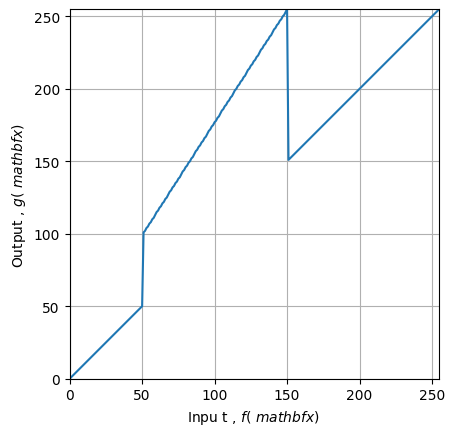

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
c = np .array( [ ( 50 , 50) ,(50,100),(150,255), ( 150 , 150) ] )
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[1,1]+1, 255, c[3,0] - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

fig , ax = plt.subplots ( )
ax.plot ( transform )
ax.set_xlabel ( r'Inpu t , $ f ( \ mathbf { x } ) $ ' )
ax.set_ylabel ( r'Output , $ g ( \ mathbf { x } ) $ ' )

ax.set_xlim ( 0 , 255 )
ax.set_ylim ( 0 , 255 )
ax.set_aspect ( 'equal' )
plt.savefig ( 'transform.png' )
plt.grid(open)
plt.show ( )
img_orig = cv.imread ( r"C:\Users\Nipun Pushpakumara\Desktop\A01\emma.jpg" , cv.IMREAD_GRAYSCALE)
cv.namedWindow ( " Image " , cv.WINDOW_AUTOSIZE )
cv.imshow ( " Image " , img_orig )
cv.waitKey ( 0 )
image_transformed = cv.LUT( img_orig , transform )
cv.imshow ( " Image " , image_transformed )
cv.waitKey ( 0 )
cv.destroyAllWindows( )


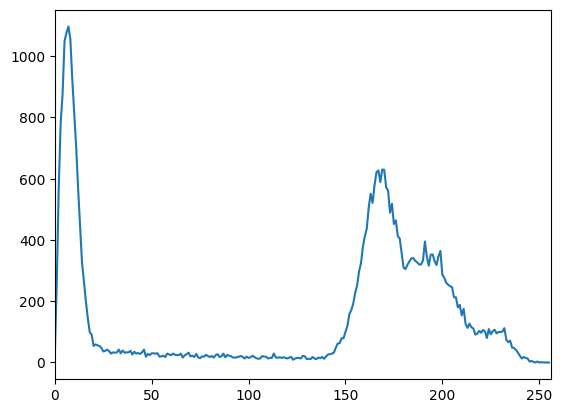

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img= cv.imread( r"C:\Users\Nipun Pushpakumara\Desktop\A01\BrainProtonDensitySlice9.png" , cv.IMREAD_GRAYSCALE)
hist=cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

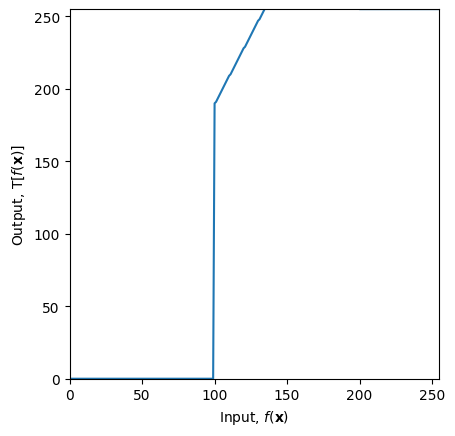

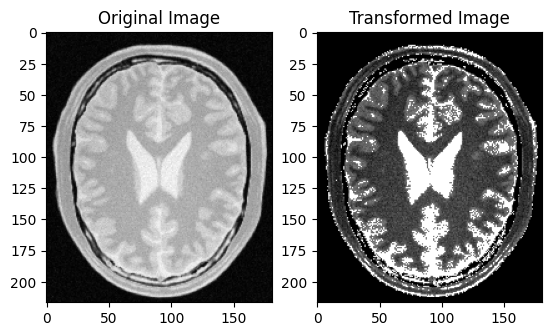

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#load the original image
img_original = cv.imread(r"C:\Users\Nipun Pushpakumara\Desktop\A01\BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)

#define an intensity transformation function to accentuate the gray matter of the image
list = np.arange(0,256)
list[0:100] = 0
list[100:200] = 1.9*list[100:200]
list[200:256] = 255

def intensity_transform(img):
    img_transformed = np.zeros_like(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            img_transformed[i,j] = list[img[i,j]]
    return img_transformed

#plot the transformation
fig, ax = plt.subplots()
ax.plot(list)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.show()

#apply the transformation function
img_transformed = intensity_transform(img_original)

#display the original and transformed images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_original, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()


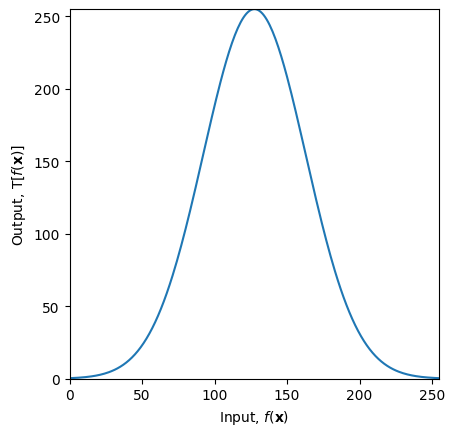

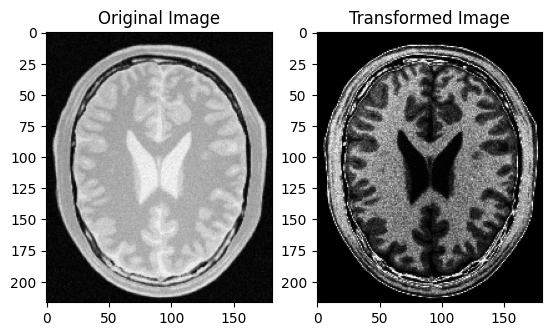

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#load the original image
img_original = cv.imread(r"C:\Users\Nipun Pushpakumara\Desktop\A01\BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)

#intensity transformation function as bell curve to accentuate gray matter
#the mean value around 130
list = np.arange(0,256)
list = 255*np.exp(-((list-127.5)/50)**2)

def intensity_transform(img):
    img_transformed = np.zeros_like(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            img_transformed[i,j] = list[img[i,j]]
    return img_transformed







#plot the transformation
fig, ax = plt.subplots()
ax.plot(list)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.show()

#apply the transformation function
img_transformed = intensity_transform(img_original)

#display the original and transformed images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_original, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()

(480, 720)


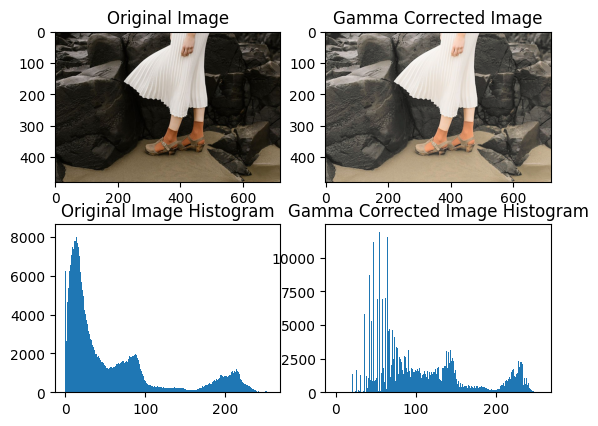

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread(r"C:\Users\Nipun Pushpakumara\Desktop\A01\highlights_and_shadows.jpg", cv.IMREAD_COLOR)

# Split the Lab plane of the image and get the L plane
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
img_lab_planes = cv.split(img_lab)
img_l = img_lab_planes[0]
print(img_l.shape)


# Adjust the gamma value as needed
gamma = 2.15
# Apply gamma correction to the L channel
img_l_gamma = np.power((img_l/255), 1/gamma) * 255
# Update the L channel with the gamma-corrected values]

# Merge the planes and convert back to BGR
img_lab_corrected = cv.merge((img_l_gamma.astype('uint8'), img_lab_planes[1].astype('uint8'), img_lab_planes[2].astype('uint8')))
img_gamma = cv.cvtColor(img_lab_corrected, cv.COLOR_LAB2BGR)

# Display the original and transformed images and relavant histogram
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(img_orig[:,:,::-1])
ax[0,0].set_title('Original Image')
ax[0,1].imshow(img_gamma[:,:,::-1])
ax[0,1].set_title('Gamma Corrected Image')
ax[1,0].hist(img_orig[:,:,0].ravel(), 256, [0,256])
ax[1,0].set_title('Original Image Histogram')
ax[1,1].hist(img_gamma[:,:,0].ravel(), 256, [0,256])
ax[1,1].set_title('Gamma Corrected Image Histogram')
plt.show()






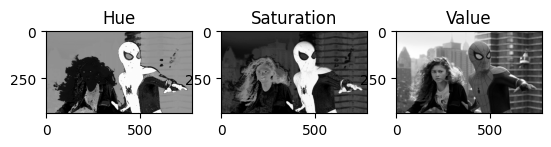

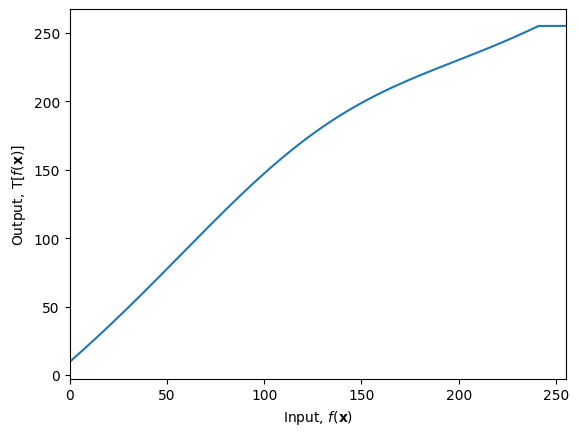

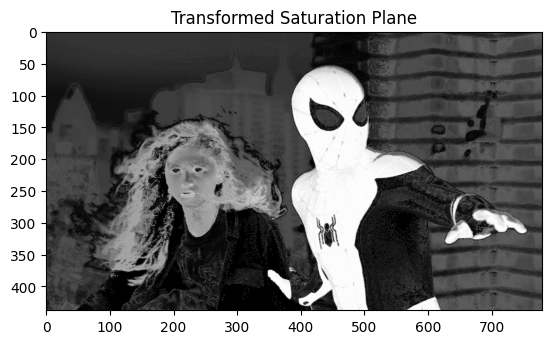

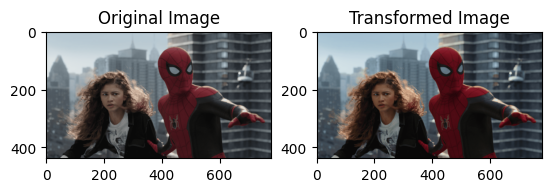

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread(r"C:\Users\Nipun Pushpakumara\Desktop\A01\spider.png", cv.IMREAD_COLOR)

# Split the image into HSV channels
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_hsv_planes = cv.split(img_hsv)
img_h = img_hsv_planes[0]
img_s = img_hsv_planes[1]
img_v = img_hsv_planes[2]

#plot h,sv plane images

fig, ax = plt.subplots(1,3)
ax[0].imshow(img_h, cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(img_s, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(img_v, cmap='gray')
ax[2].set_title('Value')
plt.show()
 
a = 0.4
ro = 70

def f(x,a):
    b = x + (a*128)*np.exp(-(((x - 128)**2)/(2*(ro**2))))
    c = min(b, 255)
    return c


#plot the transformation
x = np.linspace(0, 255, 256)
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = f(x[i],a)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)

#applying the transformation to the s plane
img_s_transformed = np.zeros_like(img_s)
for i in range(len(img_s)):
    for j in range(len(img_s[0])):
        img_s_transformed[i,j] = f(img_s[i,j],a)

#plot transformed saturation plane
fig, ax = plt.subplots()
ax.imshow(img_s_transformed, cmap='gray')
ax.set_title('Transformed Saturation Plane')
plt.show()

        
#merge the transformed s plane with the original h and v planes
img_hsv_planes_transformed = [img_h, img_s_transformed, img_v]
img_hsv_transformed = cv.merge(img_hsv_planes_transformed)
img_transformed = cv.cvtColor(img_hsv_transformed, cv.COLOR_HSV2BGR)

#display the original and transformed images grid on
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_orig[:,:,::-1])
ax[0].set_title('Original Image')
ax[1].imshow(img_transformed[:,:,::-1])
ax[1].set_title('Transformed Image')
plt.show()







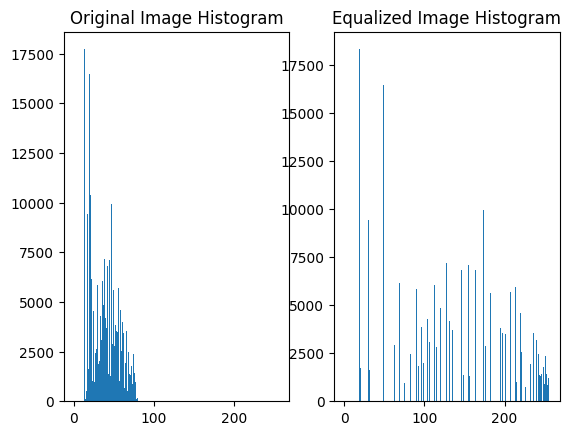

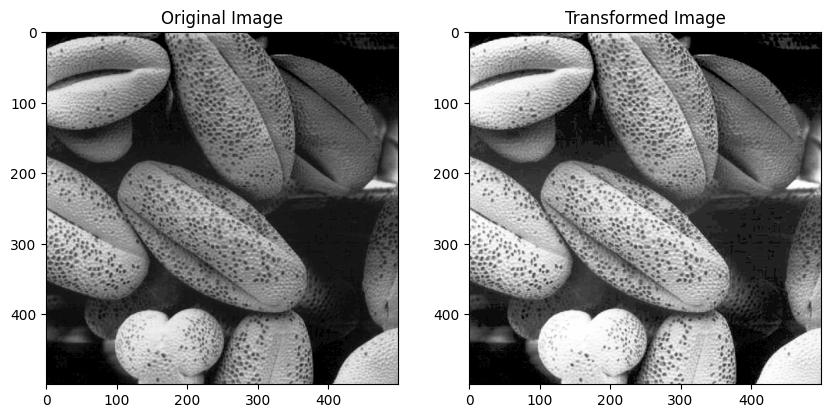

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
img_orig = cv.imread(r"C:\Users\Nipun Pushpakumara\Desktop\A01\shells.tif", cv.IMREAD_GRAYSCALE)  # Load as grayscale

# Define the histogram equalization function
def hist_equal(img):
    hist = np.zeros(256)
    # Calculate histogram
    for i in range(len(img)):
        for j in range(len(img[0])):
            hist[img[i, j]] += 1
    cdf = hist.cumsum()  # Calculate cumulative distribution function
    cdf_normalized = (255* cdf)/(img.shape[0]*img.shape[1])  # Normalize CDF
    equalized_img = np.interp(img.flatten(), range(256), cdf_normalized).reshape(img.shape)  # Apply equalization
    return equalized_img.astype(np.uint8)

# Apply the function to the image
img_equalized = hist_equal(img_orig)

#lot histograms of the original and transformed images
fig, ax = plt.subplots(1,2)
ax[0].hist(img_orig.flatten(), 256, [0,256])
ax[0].set_title('Original Image Histogram')
ax[1].hist(img_equalized.flatten(), 256, [0,256])
ax[1].set_title('Equalized Image Histogram')
plt.show()


# Display the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_equalized, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()




        

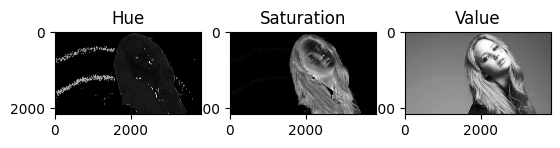

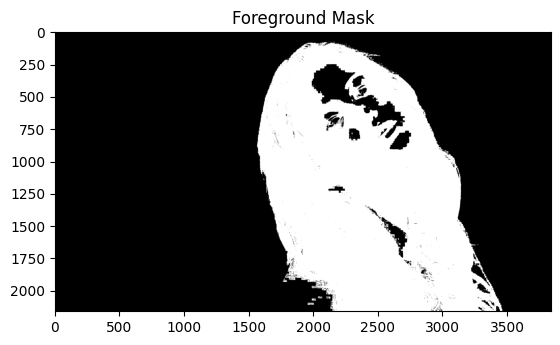

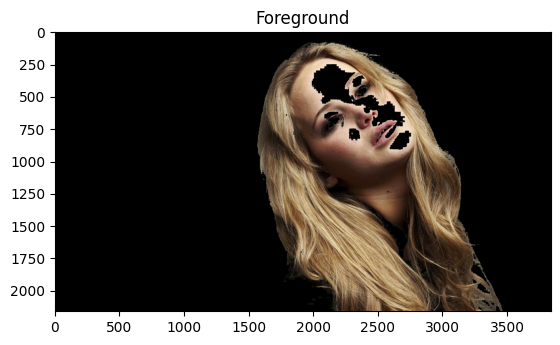

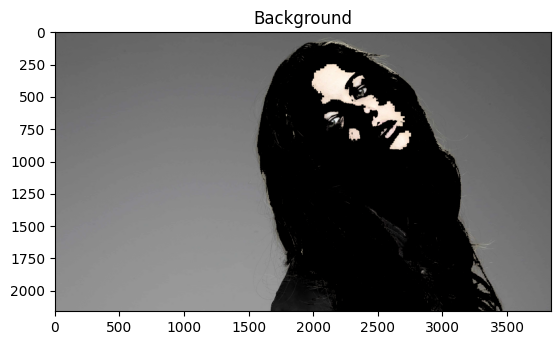

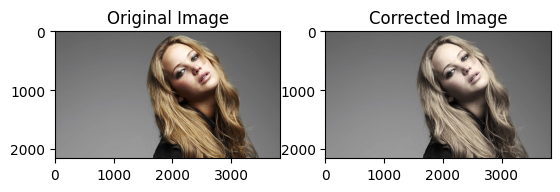

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
img_original = cv.imread(r"C:\Users\Nipun Pushpakumara\Desktop\A01\jeniffer.jpg", cv.IMREAD_COLOR)

#total number of pixels in the image
MN = len(img_original)*len(img_original[0])

#split the image into hue, saturation and value planes
hsv = cv.cvtColor(img_original, cv.COLOR_BGR2HSV) 
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]


#display the three planes
fig, ax = plt.subplots(1, 3)
ax[0].imshow(h, cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(s, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(v, cmap='gray')
ax[2].set_title('Value')
plt.show()

#apply thresholding to the saturation plane and getting foreground mask
threshold = 45
mask = np.zeros_like(s)
for i in range(len(s)):
    for j in range(len(s[0])):
        if s[i,j] > threshold:
            mask[i,j] = 255

#display the mask
fig, ax = plt.subplots()
ax.imshow(mask, cmap='gray')
ax.set_title('Foreground Mask')
plt.show()

#convert the mask into bgr
mask = cv.cvtColor(mask.astype('uint8'), cv.COLOR_GRAY2BGR)

#Obtaining foreground only using cv.bitwise
img_foreground = cv.bitwise_and(img_original, mask)
hist = cv.calcHist([img_foreground], [0], mask[:,:,0], [256], [0, 256])

#display the foreground
fig, ax = plt.subplots()
ax.imshow(cv.cvtColor(img_foreground, cv.COLOR_BGR2RGB))
ax.set_title('Foreground')
plt.show()

#obtaining cumulative sum of the histogram
cumulative_sum = np.cumsum(hist)

#defining the formula for histogram equalization
def f(x):
    return 255*cumulative_sum[x]/MN

#histogram-equalizing the r,g,b planres of the foreground seperately using above formula
# img_foreground[:,:,0] = np.vectorize(f)(img_foreground[:,:,0])
# img_foreground[:,:,1] = np.vectorize(f)(img_foreground[:,:,1])
# img_foreground[:,:,2] = np.vectorize(f)(img_foreground[:,:,2])

#split the foreground into hue, saturation and value planes
hsv = cv.cvtColor(img_foreground, cv.COLOR_BGR2HSV)
sat = hsv[:,:,1]

#histogram-equalizing the s plane
s = np.vectorize(f)(sat)
hsv[:,:,1] = s

#converting the foreground to rgb
img_foreground = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

#extracting background
img_background = cv.bitwise_and(img_original, cv.bitwise_not(mask))

#plot background
fig, ax = plt.subplots()
ax.imshow(cv.cvtColor(img_background, cv.COLOR_BGR2RGB))
ax.set_title('Background')
plt.show()

#adding the foreground and background
img_corrected = cv.add(img_foreground, img_background)

#display the image with histogram-equalized foreground along with the original image
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv.cvtColor(img_original, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
ax[1].set_title('Corrected Image')
plt.show()




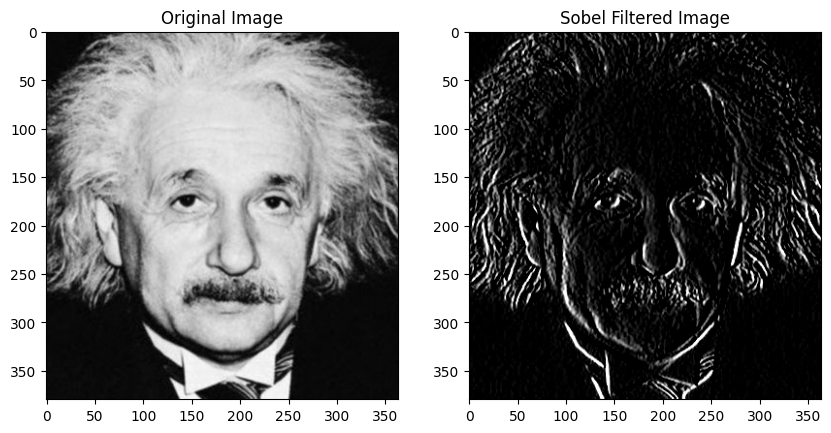

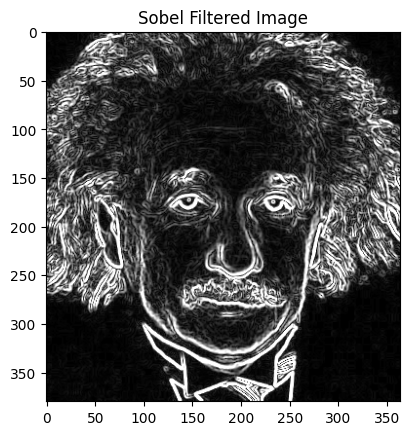

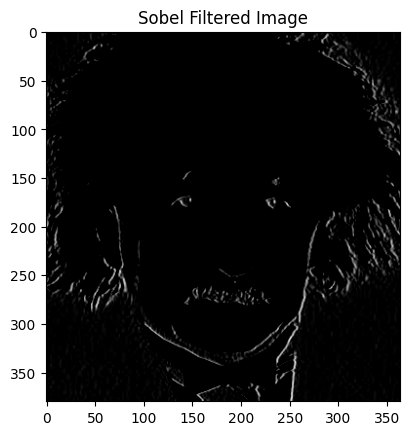

In [22]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

img_orig = cv.imread(r"C:\Users\Nipun Pushpakumara\Desktop\A01\einstein.png", cv.IMREAD_COLOR)

#a

# Using the filter2D function to sobel filter the image
img_sobel = cv.filter2D(img_orig, -1, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))

# Display the original and the sobel filtered images
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(img_sobel, cv.COLOR_BGR2RGB))
ax[1].set_title('Sobel Filtered Image')
plt.show()

#b
#defining the sobel filter function
def sobel_filter_manual(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    gradient_x = cv.filter2D(image, cv.CV_64F, sobel_x)
    gradient_y = cv.filter2D(image, cv.CV_64F, sobel_y)

    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_magnitude = np.clip(gradient_magnitude, 0, 255).astype(np.uint8)

    gradient_direction = np.arctan2(gradient_y, gradient_x)

    return gradient_magnitude, gradient_direction

#applying the sobel filter function
img_sobel_manual, img_sobel_direction = sobel_filter_manual(img_orig)

#display the sobel filtered image
fig, ax = plt.subplots()
ax.imshow(cv.cvtColor(img_sobel_manual, cv.COLOR_BGR2RGB))
ax.set_title('Sobel Filtered Image')
plt.show()

#defining the 2 kernels
kernel_1 = np.array([[1],[2],[1]], dtype=np.float32)
kernel_2 = np.array([[1,0,-1]], dtype=np.float32)

#applying the kernels
img_sobel_1 = cv.filter2D(img_orig, -1, kernel_1)
img_sobel_2= cv.filter2D(img_sobel_1, -1, kernel_2)


#plot img_sobel_2
fig, ax = plt.subplots()
ax.imshow(cv.cvtColor(img_sobel_2, cv.COLOR_BGR2RGB))
ax.set_title('Sobel Filtered Image')
plt.show()








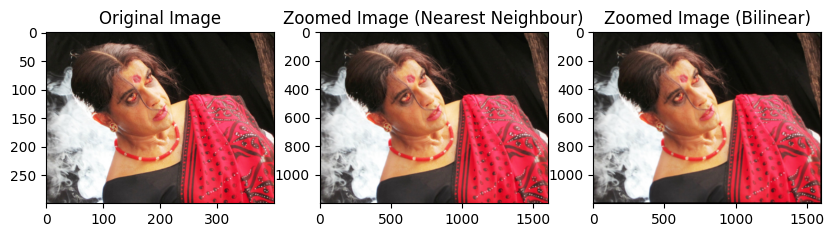

SSD value for the zoomed image using nearest neighbour interpolation:  279.4847
SSD value for the zoomed image using bilinear interpolation:  278.7438


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread(r"c:\Users\Nipun Pushpakumara\Desktop\A01\zooming\zooming\im09small.png", cv.IMREAD_COLOR) 

zoom=4

#ZOOM in using nearest neighbour interpolation
def zoom_nearest_neighbor_interpolation(img, factor):
        img_zoomed = np.zeros((int(factor * len(img)), int(factor * len(img[0])), 3), dtype=np.uint8)
        for i in range(len(img_zoomed)):
            for j in range(len(img_zoomed[0])):
                img_zoomed[i, j] = img[int(i / factor), int(j / factor)]
        return img_zoomed

# Defining a function to zoom the image with bilinear interpolation
def zoom_bilinear_interpolation(img, factor):
    img_zoomed = np.zeros((int(factor * len(img)), int(factor * len(img[0])), 3), dtype=np.uint8)
    for i in range(len(img_zoomed)):
        for j in range(len(img_zoomed[0])):
                x = i / factor
                y = j / factor
                x1 = int(x)
                y1 = int(y)
                x2 = min(x1 + 1, len(img) - 1)
                y2 = min(y1 + 1, len(img[0]) - 1)
                img_zoomed[i, j] = (img[x1, y1] * (x2 - x) * (y2 - y) + img[x1, y2] * (x2 - x) * (y - y1) + img[x2, y1] * (x - x1) * (y2 - y) + img[x2, y2] * (x - x1) * (y - y1)).astype(np.uint8)
    return img_zoomed

#zooming the image using nearest neighbour interpolation
img_zoomed = zoom_nearest_neighbor_interpolation(img_orig, zoom)

#zooming the image using bilinear interpolation
img_zoomed_bilinear = zoom_bilinear_interpolation(img_orig, zoom)

#display the original and zoomed images
fig, ax = plt.subplots(1, 3 , figsize=(10, 10))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(img_zoomed, cv.COLOR_BGR2RGB))
ax[1].set_title('Zoomed Image (Nearest Neighbour)')
ax[2].imshow(cv.cvtColor(img_zoomed_bilinear, cv.COLOR_BGR2RGB))
ax[2].set_title('Zoomed Image (Bilinear)')
plt.show()


#calculate SSD value for the zoomed image
ssd1 = 0
ssd2=0
for i in range(len(img_orig)):
    for j in range(len(img_orig[0])):
        ssd1 += np.sum((img_orig[i,j] - img_zoomed[i,j])**2)
        ssd2 += np.sum((img_orig[i,j] - img_zoomed_bilinear[i,j])**2)

ssd1 = ssd1/(len(img_orig)*len(img_orig[0]))
ssd2 = ssd2/(len(img_orig)*len(img_orig[0]))

print('SSD value for the zoomed image using nearest neighbour interpolation: ', ssd1)
print('SSD value for the zoomed image using bilinear interpolation: ', ssd2)




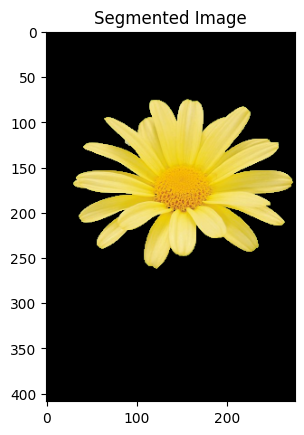

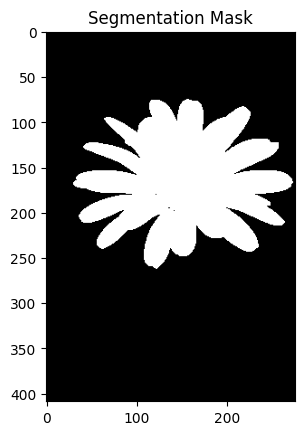

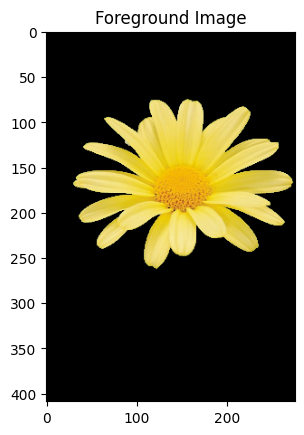

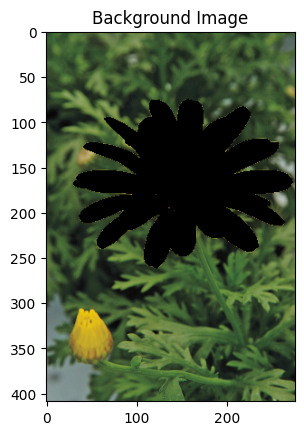

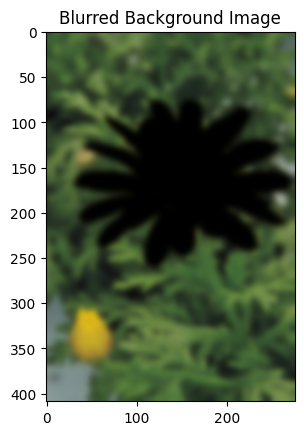

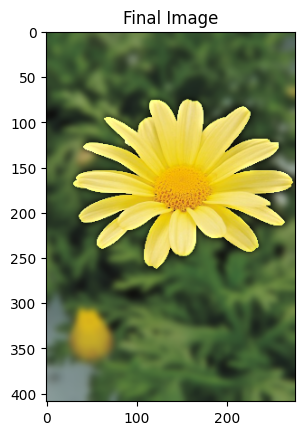

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread(r"C:\Users\Nipun Pushpakumara\Desktop\A01\A01.png", cv.IMREAD_COLOR)

# Create a mask and initialize bgdModel and fgdModel
mask = np.zeros(img_orig.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define the rectangle for the initial GrabCut
rect = (0, 0, img_orig.shape[1]-1, img_orig.shape[0]-100)
cv.grabCut(img_orig, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Modify the mask to create a binary mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the original image
img_segmented = img_orig * mask2[:, :, np.newaxis]

# Display the segmented image
plt.imshow(cv.cvtColor(img_segmented, cv.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.show()

#show final segmentation mask
plt.imshow(mask2, cmap='gray')
plt.title('Segmentation Mask')
plt.show()

#show foreground image
plt.imshow(cv.cvtColor(img_orig * mask2[:, :, np.newaxis], cv.COLOR_BGR2RGB))
plt.title('Foreground Image')
plt.show()

#show background image
plt.imshow(cv.cvtColor(img_orig * (1 - mask2)[:, :, np.newaxis], cv.COLOR_BGR2RGB))
plt.title('Background Image')
plt.show()

#blurr background image
img_blurred = cv.GaussianBlur(img_orig * (1 - mask2)[:, :, np.newaxis], (21, 21), 0)

#show blurred background image
plt.imshow(cv.cvtColor(img_blurred, cv.COLOR_BGR2RGB))
plt.title('Blurred Background Image')
plt.show()

#merge foreground and background
img_final = cv.add(img_orig * mask2[:, :, np.newaxis], img_blurred, dtype=cv.CV_8UC3)
plt.imshow(cv.cvtColor(img_final, cv.COLOR_BGR2RGB))
plt.title('Final Image')
plt.show()



